In [1]:
# ===============================
# LASSO REGRESSION IMPLEMENTATION
# Beginner -> Advanced (Complete)
# ===============================

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# -------------------------------
# 2. Dataset Creation (Synthetic)
# -------------------------------
X, y = make_regression(
    n_samples=200, n_features=10, noise=10, random_state=42
)

# Save synthetic dataset as CSV (to simulate real dataset)
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df["Target"] = y
df.to_csv("lasso_dataset.csv", index=False)

# Load dataset from CSV
data = pd.read_csv("lasso_dataset.csv")
X = data.drop("Target", axis=1)
y = data["Target"]


In [3]:
# -------------------------
# 3. Train/Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# -------------------------
# 4. Basic Lasso Regression
# -------------------------
lasso_basic = Lasso(alpha=1.0, random_state=42)
lasso_basic.fit(X_train, y_train)

y_pred_basic = lasso_basic.predict(X_test)

print("\n=== Basic Lasso Regression ===")
print("Intercept:", lasso_basic.intercept_)
print("Coefficients:", lasso_basic.coef_)
print("MSE:", mean_squared_error(y_test, y_pred_basic))
print("R² Score:", r2_score(y_test, y_pred_basic))
print("MAE:", mean_absolute_error(y_test, y_pred_basic))



=== Basic Lasso Regression ===
Intercept: 0.6648905241078218
Coefficients: [30.15504069 33.98066764  6.60100444 93.23460742  9.47770643 93.14934229
 39.255992   79.47701877 50.93960057  6.42760386]
MSE: 118.3598398613346
R² Score: 0.9965471274141204
MAE: 8.143856991345801


In [5]:
# -------------------------
# 5. Hyperparameter Tuning
# -------------------------
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_grid = GridSearchCV(
    Lasso(random_state=42),
    param_grid={'alpha': alphas},
    cv=5,
    scoring='r2'
)
lasso_grid.fit(X_train, y_train)

print("\n=== GridSearchCV Results ===")
print("Best Alpha:", lasso_grid.best_params_['alpha'])
print("Best R² Score:", lasso_grid.best_score_)


=== GridSearchCV Results ===
Best Alpha: 0.001
Best R² Score: 0.9958693749315725


In [6]:

# -------------------------
# 6. Automatic Cross-Validation (LassoCV)
# -------------------------
lasso_cv = LassoCV(alphas=None, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)

print("\n=== LassoCV Results ===")
print("Best Alpha from CV:", lasso_cv.alpha_)
print("Coefficients:", lasso_cv.coef_)


=== LassoCV Results ===
Best Alpha from CV: 0.09935746262112943
Coefficients: [30.85463463 35.05509028  7.54984653 94.01037962 10.2673564  94.33536786
 40.47297316 80.37982517 51.91956597  7.19665098]


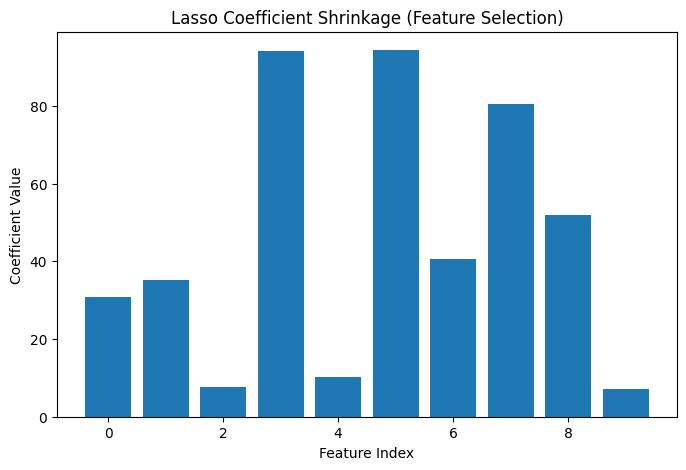

In [7]:

# -------------------------
# 7. Feature Selection Effect (Coefficient Sparsity)
# -------------------------
plt.figure(figsize=(8, 5))
plt.bar(range(len(lasso_cv.coef_)), lasso_cv.coef_)
plt.title("Lasso Coefficient Shrinkage (Feature Selection)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()


=== Final Evaluation (Best Model) ===
MSE: 101.28453295332456
R² Score: 0.9970452597129409
MAE: 7.52779331652018


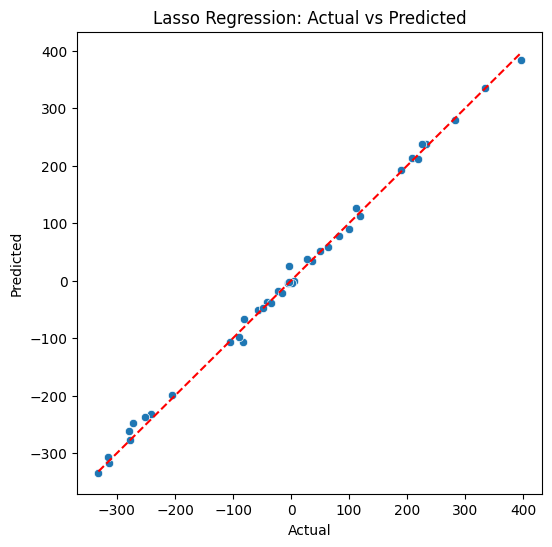

In [8]:

# -------------------------
# 8. Model Evaluation
# -------------------------
y_pred_cv = lasso_cv.predict(X_test)

print("\n=== Final Evaluation (Best Model) ===")
print("MSE:", mean_squared_error(y_test, y_pred_cv))
print("R² Score:", r2_score(y_test, y_pred_cv))
print("MAE:", mean_absolute_error(y_test, y_pred_cv))

# Plot Predictions vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_cv)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # Perfect fit line
plt.show()
